In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Análise de cor e raça nas eleições para prefeitos em 2024.

In [ ]:
coreraca_turno1 = pd.read_csv('1turno24crpref.csv', sep= ';', encoding= 'latin1' )
coreraca_turno2 = pd.read_csv('2turno24crpref.csv', sep= ';', encoding= 'latin1' )
coreraca_turno1 = coreraca_turno1.drop(columns=['Data de carga'])
coreraca_turno2 = coreraca_turno2.drop(columns=['Data de carga'])
coreraca_turno1.insert(3, 'Turno', "1 turno")
coreraca_turno2.insert(3, 'Turno', "2 turno")
coreraca=pd.concat([coreraca_turno1, coreraca_turno2], ignore_index=True)
coreraca['Porcentagem'] = coreraca['Porcentagem'].str.replace(',','.')
coreraca["Porcentagem"] = coreraca["Porcentagem"].astype(float)
coreraca["Porcentagem"] = coreraca["Porcentagem"] * 100
coreraca.rename(columns={'Cor/raça': 'Cor/raca'}, inplace = True)
coreraca = coreraca.drop(3)
coreraca = coreraca.drop(1)

In [ ]:
coreraca

,Cor/raca,Quantitativo,Porcentagem,Turno
0,Indígena,2578,0.56,1 turno
2,Branca,217021,46.83,1 turno
4,Parda,186744,40.30,1 turno
5,Amarela,1791,0.39,1 turno
6,Preta,52452,11.32,1 turno
7,Branca,146,71.57,2 turno
8,Parda,39,19.12,2 turno
9,Amarela,4,1.96,2 turno
10,Preta,15,7.35,2 turno


Análise geral do desempenho das cores e raças durante a eleição de 2024 para prefeito.

Text(0.5, 1.0, 'Porcentagem por Cor/Raça (total) em 2024 (prefeito)')

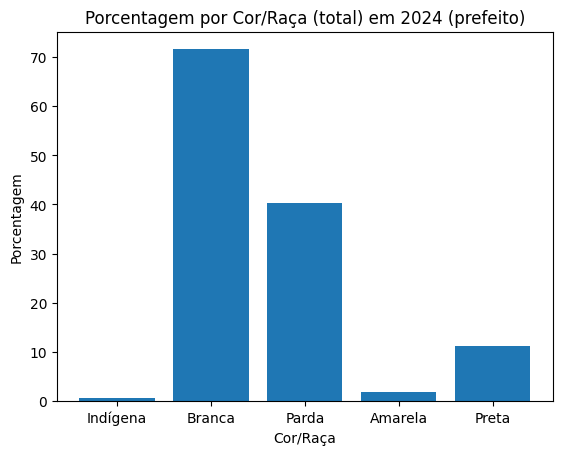

In [ ]:
plt.bar(coreraca['Cor/raca'], coreraca['Porcentagem'])
plt.xlabel('Cor/Raça')
plt.ylabel('Porcentagem')
plt.title('Porcentagem por Cor/Raça (total) em 2024 (prefeito)')

Text(0.5, 1.0, 'Quantitativo por Cor/Raça (total) em 2024 (prefeito)')

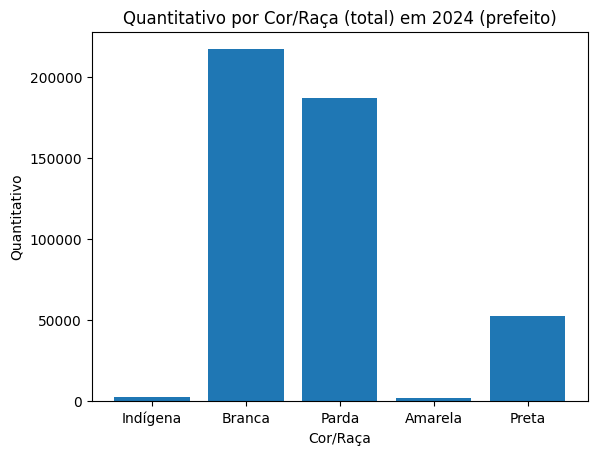

In [ ]:
plt.bar(coreraca['Cor/raca'], coreraca['Quantitativo'])
plt.xlabel('Cor/Raça')
plt.ylabel('Quantitativo')
plt.title('Quantitativo por Cor/Raça (total) em 2024 (prefeito)')

Análise do desempenho entre 1º e 2º turno de cores e raças na eleição para prefeitos de 2024.

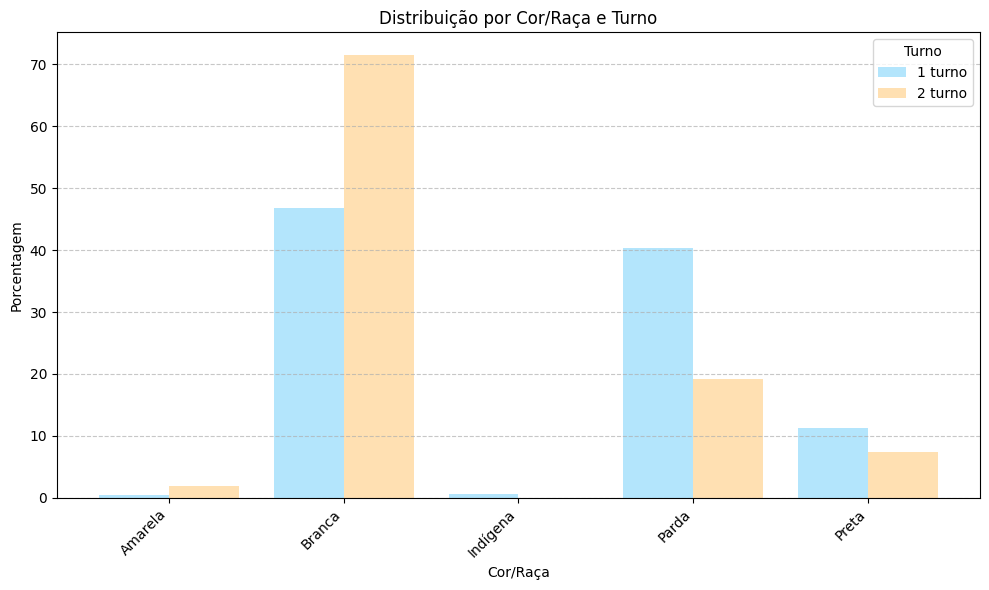

In [ ]:
coreraca_pivot = coreraca.pivot(index='Cor/raca', columns='Turno', values='Porcentagem').fillna(0)

# Configurar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))

# Configuração das barras
x = range(len(coreraca_pivot))  # Posições no eixo X (índice das raças)
bar_width = 0.4  # Largura de cada barra
offset = -bar_width / 2  # Ajustar o deslocamento para agrupar

# Cores para os turnos
cores = ['#B3E5FC', '#FFE0B2']

# Plotar barras para cada turno
for i, turno in enumerate(coreraca_pivot.columns):
    ax.bar(
        [pos + offset + i * bar_width for pos in x],
        coreraca_pivot[turno],
        width=bar_width,
        label=f"{turno}",
        color=cores[i]
    )

# Personalizar o gráfico
ax.set_xticks(x)
ax.set_xticklabels(coreraca_pivot.index, rotation=45, ha="right", fontsize=10)
ax.set_title("Distribuição por Cor/Raça e Turno")
ax.set_xlabel("Cor/Raça")
ax.set_ylabel("Porcentagem")
ax.legend(title="Turno")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Desempenho de Cores e Raças por Turno em 2024 para prefeito'),
 Text(0.5, 0, 'Turno'),
 Text(0, 0.5, 'Porcentagem')]

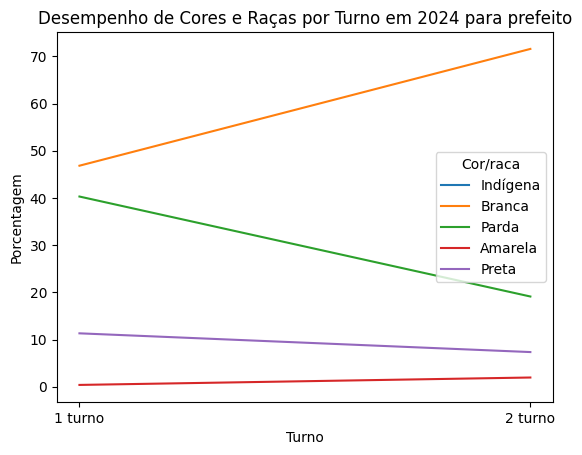

In [ ]:
sns.lineplot(data=coreraca, x='Turno', y='Porcentagem', hue='Cor/raca', markers=True).set(title='Desempenho de Cores e Raças por Turno em 2024 para prefeito', xlabel='Turno', ylabel='Porcentagem')

Análise de cor e raça para vereadores entre 2016 e 2024

In [ ]:
vereador24 = pd.read_csv('vereadorcer24.csv', sep= ';', encoding= 'latin1' )
vereador20 = pd.read_csv('vereadorcer20.csv', sep= ';', encoding= 'latin1' )
vereador16 = pd.read_csv('vereadorcer16.csv', sep= ';', encoding= 'latin1' )
vereador24 = vereador24.drop(columns=['Data de carga'])
vereador20 = vereador20.drop(columns=['Data de carga'])
vereador16 = vereador16.drop(columns=['Data de carga'])
vereador24.insert(3, 'Ano', "2024")
vereador20.insert(3, 'Ano', "2020")
vereador16.insert(3, 'Ano', "2016")
vereador=pd.concat([vereador24, vereador20, vereador16], ignore_index=True)
vereador['Porcentagem'] = vereador['Porcentagem'].str.replace(',','.')
vereador["Porcentagem"] = vereador["Porcentagem"].astype(float)
vereador["Porcentagem"] = vereador["Porcentagem"] * 100
vereador.rename(columns={'Cor/raça': 'Cor/raca'}, inplace = True)
vereador = vereador.drop(1)
vereador = vereador.drop(3)
vereador = vereador.drop(10)
vereador = vereador.drop(11)
vereador = vereador.drop(17)
vereador

,Cor/raca,Quantitativo,Porcentagem,Ano
0,Indígena,2578,0.56,2024
2,Branca,217020,46.83,2024
4,Parda,186745,40.30,2024
5,Amarela,1791,0.39,2024
6,Preta,52452,11.32,2024
7,Amarela,1959,0.35,2020
8,Branca,267911,48.04,2020
9,Indígena,2216,0.40,2020
12,Parda,220261,39.50,2020
13,Preta,58687,10.52,2020


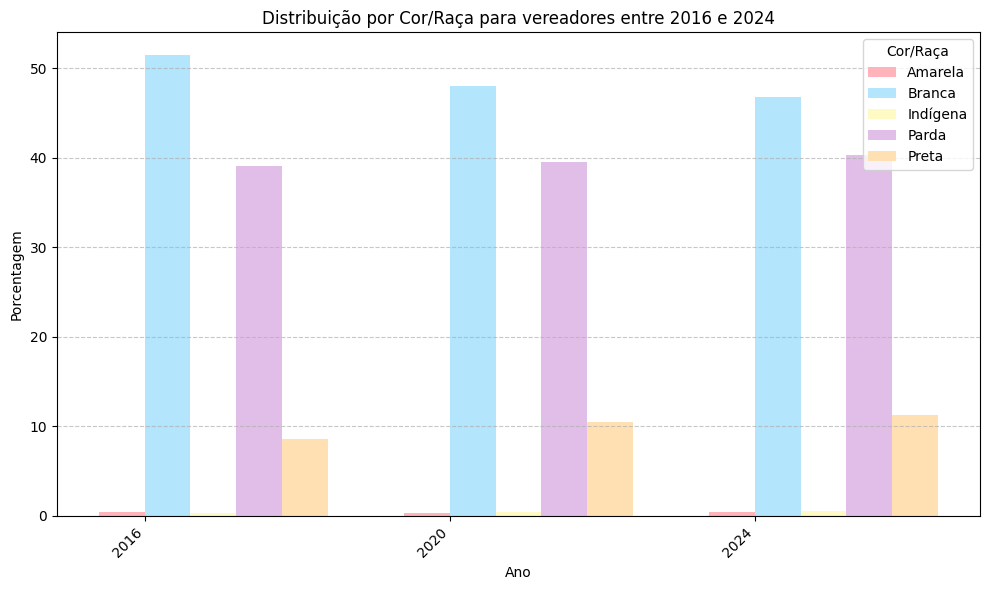

In [ ]:
vereador_pivot = vereador.pivot(index='Ano', columns='Cor/raca', values='Porcentagem').fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(vereador_pivot))
bar_width = 0.15
offset = -bar_width / 2

cores = ['#FFB3BA', '#B3E5FC', '#FFF9C4', '#E1BEE7', '#FFE0B2']

for i, Ano in enumerate(vereador_pivot.columns):
    ax.bar(
        [pos + offset + i * bar_width for pos in x],
        vereador_pivot[Ano],
        width=bar_width,
        label=f"{Ano}",
        color=cores[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(vereador_pivot.index, rotation=45, ha="right", fontsize=10)
ax.set_title("Distribuição por Cor/Raça para vereadores entre 2016 e 2024")
ax.set_xlabel("Ano")
ax.set_ylabel("Porcentagem")
ax.legend(title="Cor/Raça")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

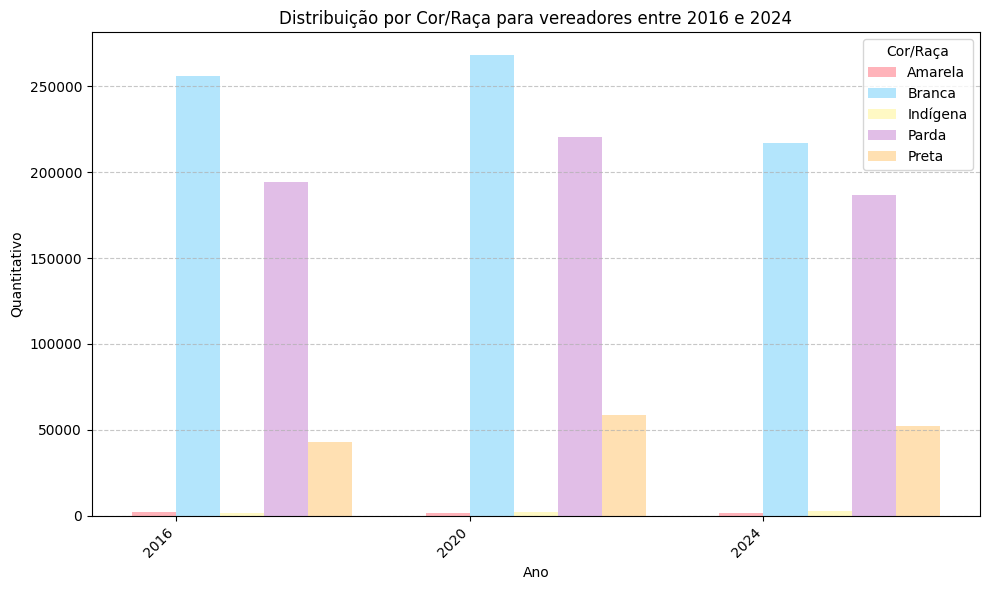

In [ ]:
vereador_pivot = vereador.pivot(index='Ano', columns='Cor/raca', values='Quantitativo').fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(vereador_pivot))
bar_width = 0.15
offset = -bar_width / 2

cores = ['#FFB3BA', '#B3E5FC', '#FFF9C4', '#E1BEE7', '#FFE0B2']

for i, Ano in enumerate(vereador_pivot.columns):
    ax.bar(
        [pos + offset + i * bar_width for pos in x],
        vereador_pivot[Ano],
        width=bar_width,
        label=f"{Ano}",
        color=cores[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(vereador_pivot.index, rotation=45, ha="right", fontsize=10)
ax.set_title("Distribuição por Cor/Raça para vereadores entre 2016 e 2024")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantitativo")
ax.legend(title="Cor/Raça")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Análise de cor e raça nas eleições para governadores em 2024

In [ ]:
governador1 = pd.read_csv('1turno22crgov.csv', sep= ';', encoding= 'latin1' )
governador2 = pd.read_csv('2turno22crgov.csv', sep= ';', encoding= 'latin1' )
governador1 = governador1.drop(columns=['Data de carga'])
governador2 = governador2.drop(columns=['Data de carga'])
governador1.insert(3, 'Turno', "1 turno")
governador2.insert(3, 'Turno', "2 turno")
governador=pd.concat([governador1, governador2], ignore_index=True)
governador['Porcentagem'] = governador['Porcentagem'].str.replace(',','.')
governador["Porcentagem"] = governador["Porcentagem"].astype(float)
governador["Porcentagem"] = governador["Porcentagem"] * 100
governador.rename(columns={'Cor/raça': 'Cor/raca'}, inplace = True)
governador = governador.drop(3)
governador = governador.drop(4)
governador

,Cor/raca,Quantitativo,Porcentagem,Turno
0,Amarela,116,0.40,1 turno
1,Branca,14100,48.19,1 turno
2,Indígena,186,0.64,1 turno
5,Parda,10579,36.15,1 turno
6,Preta,4133,14.12,1 turno
7,Branca,38,73.08,2 turno
8,Indígena,2,3.85,2 turno
9,Parda,11,21.15,2 turno
10,Preta,1,1.92,2 turno


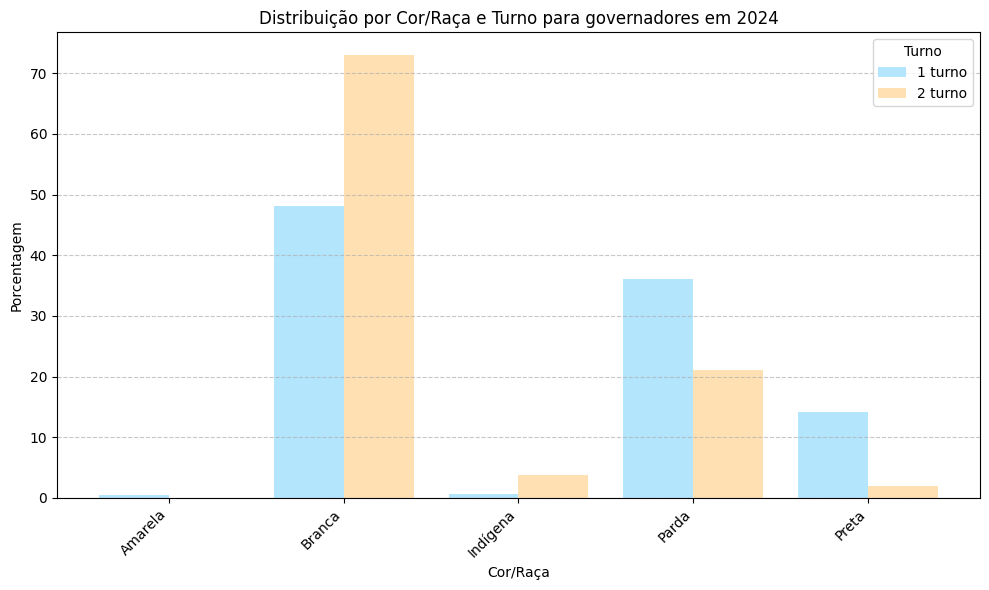

In [ ]:
governador_pivot = governador.pivot(index='Cor/raca', columns='Turno', values='Porcentagem').fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(governador_pivot))
bar_width = 0.4
offset = -bar_width / 2

cores = ['#B3E5FC', '#FFE0B2']

for i, turno in enumerate(governador_pivot.columns):
    ax.bar(
        [pos + offset + i * bar_width for pos in x],
        governador_pivot[turno],
        width=bar_width,
        label=f"{turno}",
        color=cores[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(governador_pivot.index, rotation=45, ha="right", fontsize=10)
ax.set_title("Distribuição por Cor/Raça e Turno para governadores em 2024")
ax.set_xlabel("Cor/Raça")
ax.set_ylabel("Porcentagem")
ax.legend(title="Turno")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Análise geral de cor e raça e desempenho nas eleições para senadores entre 2022, 2018 e 2014

In [ ]:
senador22 = pd.read_csv('senador22cr.csv', sep= ';', encoding= 'latin1' )
senador18 = pd.read_csv('senador18cr.csv', sep= ';', encoding= 'latin1' )
senador14 = pd.read_csv('senador14cr.csv', sep= ';', encoding= 'latin1' )
senador22 = senador22.drop(columns=['Data de carga'])
senador18 = senador18.drop(columns=['Data de carga'])
senador14 = senador14.drop(columns=['Data de carga'])
senador22.insert(3, 'Ano', "2022")
senador18.insert(3, 'Ano', "2018")
senador14.insert(3, 'Ano', "2014")
senador=pd.concat([senador22, senador18, senador14], ignore_index=True)
senador['Porcentagem'] = senador['Porcentagem'].str.replace(',','.')
senador["Porcentagem"] = senador["Porcentagem"].astype(float)
senador["Porcentagem"] = senador["Porcentagem"] * 100
senador.rename(columns={'Cor/raça': 'Cor/raca'}, inplace = True)
senador = senador.drop(1)
senador = senador.drop(3)
senador = senador.drop(10)
senador = senador.drop(11)
senador = senador.drop(17)
senador

FileNotFoundError: [Errno 2] No such file or directory: 'senador22cr.csv'

In [ ]:
senador_pivot = senador.pivot(index='Ano', columns='Cor/raca', values='Quantitativo').fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(senador_pivot))
bar_width = 0.15
offset = -bar_width / 2

cores = ['#FFB3BA', '#B3E5FC', '#FFF9C4', '#E1BEE7', '#FFE0B2']

for i, Ano in enumerate(senador_pivot.columns):
    ax.bar(
        [pos + offset + i * bar_width for pos in x],
        senador_pivot[Ano],
        width=bar_width,
        label=f"{Ano}",
        color=cores[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(senador_pivot.index, rotation=45, ha="right", fontsize=10)
ax.set_title("Distribuição por Cor/Raça para senadores entre 2016 e 2024")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantitativo")
ax.legend(title="Cor/Raça")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Análise geral de cor e raça e desempenho nas eleições para deputados federais entre 2022, 2018 e 2014

In [ ]:
depf22 = pd.read_csv('depf22cr.csv', sep= ';', encoding= 'latin1' )
depf18 = pd.read_csv('depf18cr.csv', sep= ';', encoding= 'latin1' )
depf14 = pd.read_csv('depf14cr.csv', sep= ';', encoding= 'latin1' )
depf22 = depf22.drop(columns=['Data de carga'])
depf18 = depf18.drop(columns=['Data de carga'])
depf14 = depf14.drop(columns=['Data de carga'])
depf22.insert(3, 'Ano', "2022")
depf18.insert(3, 'Ano', "2018")
depf14.insert(3, 'Ano', "2014")
depf=pd.concat([depf22, depf18, depf14], ignore_index=True)
depf['Porcentagem'] = depf['Porcentagem'].str.replace(',','.')
depf["Porcentagem"] = depf["Porcentagem"].astype(float)
depf["Porcentagem"] = depf["Porcentagem"] * 100
depf.rename(columns={'Cor/raça': 'Cor/raca'}, inplace = True)
depf = depf.drop(1)
depf = depf.drop(3)
depf = depf.drop(10)
depf = depf.drop(11)
depf = depf.drop(17)
depf

In [ ]:
depf_pivot = depf.pivot(index='Ano', columns='Cor/raca', values='Quantitativo').fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(depf_pivot))
bar_width = 0.15
offset = -bar_width / 2

cores = ['#FFB3BA', '#B3E5FC', '#FFF9C4', '#E1BEE7', '#FFE0B2']

for i, Ano in enumerate(depf_pivot.columns):
    ax.bar(
        [pos + offset + i * bar_width for pos in x],
        depf_pivot[Ano],
        width=bar_width,
        label=f"{Ano}",
        color=cores[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(depf_pivot.index, rotation=45, ha="right", fontsize=10)
ax.set_title("Distribuição por Cor/Raça para deputados federais entre 2016 e 2024")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantitativo")
ax.legend(title="Cor/Raça")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Análise geral de cor e raça e desempenho nas eleições para deputados estaduais entre 2022, 2018 e 2014

In [ ]:
depe22 = pd.read_csv('depe22cr.csv', sep= ';', encoding= 'latin1' )
depe18 = pd.read_csv('depe18cr.csv', sep= ';', encoding= 'latin1' )
depe14 = pd.read_csv('depe14cr.csv', sep= ';', encoding= 'latin1' )
depe22 = depe22.drop(columns=['Data de carga'])
depe18 = depe18.drop(columns=['Data de carga'])
depe14 = depe14.drop(columns=['Data de carga'])
depe22.insert(3, 'Ano', "2022")
depe18.insert(3, 'Ano', "2018")
depe14.insert(3, 'Ano', "2014")
depe=pd.concat([depe22, depe18, depe14], ignore_index=True)
depe['Porcentagem'] = depe['Porcentagem'].str.replace(',','.')
depe["Porcentagem"] = depe["Porcentagem"].astype(float)
depe["Porcentagem"] = depe["Porcentagem"] * 100
depe.rename(columns={'Cor/raça': 'Cor/raca'}, inplace = True)
#depe = depe.drop(1)
#depe = depe.drop(3)
#depe = depe.drop(10)
#depe = depe.drop(11)
#depe = depe.drop(17)
depe

In [ ]:
depe_pivot = depe.pivot(index='Ano', columns='Cor/raca', values='Quantitativo').fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(depe_pivot))
bar_width = 0.15
offset = -bar_width / 2

cores = ['#FFB3BA', '#B3E5FC', '#FFF9C4', '#E1BEE7', '#FFE0B2']

for i, Ano in enumerate(depe_pivot.columns):
    ax.bar(
        [pos + offset + i * bar_width for pos in x],
        depe_pivot[Ano],
        width=bar_width,
        label=f"{Ano}",
        color=cores[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(depe_pivot.index, rotation=45, ha="right", fontsize=10)
ax.set_title("Distribuição por Cor/Raça para deputados estaduais entre 2016 e 2024")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantitativo")
ax.legend(title="Cor/Raça")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Análise geral de cor e raça e desempenho nas eleições para presidentes em 2022

In [ ]:
presidente1 = pd.read_csv('1turno22crpres.csv', sep= ';', encoding= 'latin1' )
presidente2 = pd.read_csv('2turno22crpres.csv', sep= ';', encoding= 'latin1' )
presidente1 = presidente1.drop(columns=['Data de carga'])
presidente2 = presidente2.drop(columns=['Data de carga'])
presidente1.insert(3, 'Turno', "1 turno")
presidente2.insert(3, 'Turno', "2 turno")
presidente=pd.concat([presidente1, presidente2], ignore_index=True)
presidente['Porcentagem'] = presidente['Porcentagem'].str.replace(',','.')
presidente["Porcentagem"] = presidente["Porcentagem"].astype(float)
presidente["Porcentagem"] = presidente["Porcentagem"] * 100
presidente.rename(columns={'Cor/raça': 'Cor/raca'}, inplace = True)
#presidente = presidente.drop(3)
#presidente = presidente.drop(4)
presidente

In [ ]:
presidente_pivot = presidente.pivot(index='Cor/raca', columns='Turno', values='Porcentagem').fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(presidente_pivot))
bar_width = 0.4
offset = -bar_width / 2

cores = ['#B3E5FC', '#FFE0B2']

for i, turno in enumerate(presidente_pivot.columns):
    ax.bar(
        [pos + offset + i * bar_width for pos in x],
        presidente_pivot[turno],
        width=bar_width,
        label=f"{turno}",
        color=cores[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(presidente_pivot.index, rotation=45, ha="right", fontsize=10)
ax.set_title("Distribuição por Cor/Raça e Turno para presidente em 2024")
ax.set_xlabel("Cor/Raça")
ax.set_ylabel("Porcentagem")
ax.legend(title="Turno")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Análise geral de cor e raça e desempenho nas eleições para vice presidentes entre 2022

In [ ]:
vicepresidente1 = pd.read_csv('1turno22crvicepres.csv', sep= ';', encoding= 'latin1' )
vicepresidente2 = pd.read_csv('2turno22crvicepres.csv', sep= ';', encoding= 'latin1' )
vicepresidente1 = vicepresidente1.drop(columns=['Data de carga'])
vicepresidente2 = vicepresidente2.drop(columns=['Data de carga'])
vicepresidente1.insert(3, 'Turno', "1 turno")
vicepresidente2.insert(3, 'Turno', "2 turno")
vicepresidente=pd.concat([vicepresidente1, vicepresidente2], ignore_index=True)
vicepresidente['Porcentagem'] = vicepresidente['Porcentagem'].str.replace(',','.')
vicepresidente["Porcentagem"] = vicepresidente["Porcentagem"].astype(float)
vicepresidente["Porcentagem"] = vicepresidente["Porcentagem"] * 100
vicepresidente.rename(columns={'Cor/raça': 'Cor/raca'}, inplace = True)
#vicepresidente = vicepresidente.drop(3)
#vicepresidente = vicepresidente.drop(4)
vicepresidente

In [ ]:
vicepresidente_pivot = vicepresidente.pivot(index='Cor/raca', columns='Turno', values='Porcentagem').fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(vicepresidente_pivot))
bar_width = 0.4
offset = -bar_width / 2

cores = ['#B3E5FC', '#FFE0B2']

for i, turno in enumerate(vicepresidente_pivot.columns):
    ax.bar(
        [pos + offset + i * bar_width for pos in x],
        vicepresidente_pivot[turno],
        width=bar_width,
        label=f"{turno}",
        color=cores[i]
    )

ax.set_xticks(x)
ax.set_xticklabels(vicepresidente_pivot.index, rotation=45, ha="right", fontsize=10)
ax.set_title("Distribuição por Cor/Raça e Turno para vice presidente em 2024")
ax.set_xlabel("Cor/Raça")
ax.set_ylabel("Porcentagem")
ax.legend(title="Turno")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()